# Date Time object

In [27]:
import datetime

# Get current date time

In [28]:
datetime_object = datetime.datetime.now()
print(datetime_object)

2021-09-17 21:06:47.214534


# Date

# Read only date

In [29]:
date_object = datetime.date.today()
print(date_object)

2021-09-17


# Use date class

In [30]:
d = datetime.date(2019, 4, 13)
print(d)

2019-04-13


# Print Year, month and day

In [31]:
print("Current year:", d.year)
print("Current month:", d.month)
print("Current day:", d.day)

Current year: 2019
Current month: 4
Current day: 13


# Time

# a.

In [32]:
#Default is hour=0 , minute=0 and seconds=0
a = datetime.time()
print("a =", a)

a = 00:00:00


# b.

In [33]:
b = datetime.time(11, 34, 56)
print("b =", b)

b = 11:34:56


In [34]:
# time(hour, minute and second)
c = datetime.time(hour = 11, minute = 34, second = 56)
print("c =", c)

c = 11:34:56


# c.

In [35]:
# time(hour, minute, second, microsecond)
d = datetime.time(11, 34, 56, 234566)
print("d =", d)

d = 11:34:56.234566


# Print Hours , minutes and seconds 

In [36]:
print("hour =", d.hour)
print("minute =", d.minute)
print("second =", d.second)
print("microsecond =", d.microsecond)

hour = 11
minute = 34
second = 56
microsecond = 234566


# Date+Time

In [37]:
from datetime import datetime

In [38]:
b = datetime(2017, 11, 28, 23, 55, 59, 342380)
print(b)

2017-11-28 23:55:59.342380


# Difference Between Two times

In [39]:
from datetime import datetime, date
t1 = date(year = 2018, month = 7, day = 12)
t2 = date(year = 2017, month = 12, day = 23)
t3 = t1 - t2
print("t3 =", t3)
print("type of t3 =", type(t3)) 

t3 = 201 days, 0:00:00
type of t3 = <class 'datetime.timedelta'>


# strftime

It creates a string for a give datetime object

In [40]:
from datetime import datetime

In [41]:
# current date and time
now = datetime.now()

In [42]:
t = now.strftime("%H:%M:%S")
print(t)

21:06:51


In [43]:
s1 = now.strftime("%m/%d/%Y, %H:%M:%S")
# mm/dd/YY H:M:S format
print(s1)

09/17/2021, 21:06:51


In [44]:
s2 = now.strftime("%d/%m/%Y, %H:%M:%S")
# dd/mm/YY H:M:S format
print(s2)

17/09/2021, 21:06:51


# strptime

In [45]:
from datetime import datetime

In [46]:
date_string = "21 June, 2018"
date_object = datetime.strptime(date_string, "%d %B, %Y")
print(date_object)

2018-06-21 00:00:00


# Time Series Data

**Time series data** : is a sequence of data points that comprises of measurements made over a time interval, where the time interval is continuous, having the same distance between consecutive data points, while generating at most one data point for each given moment in time.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
#this module gives us some controls over plot rendering attributes
from pylab import rcParams 
rcParams['figure.figsize'] = 15, 10

In [49]:
#this line enables the plots to be embedded into the notebook
%matplotlib inline

# Importing Time Series Data

Below is a dataset extracted from Yahoo Finance showing the daily Apple stock price movements from 1980 to February 2016.

In [50]:
ts_data = pd.read_csv('appleStockPrice.csv')

In [51]:
ts_data.head(10)

Date        Open        High        Low       Close     Volume  \
0  2016-02-03   95.000000   96.839996  94.080002   96.349998   45964300   
1  2016-02-02   95.419998   96.040001  94.279999   94.480003   37357200   
2  2016-02-01   96.470001   96.709999  95.400002   96.430000   40943500   
3  2016-01-29   94.790001   97.339996  94.349998   97.339996   64416500   
4  2016-01-28   93.790001   94.519997  92.389999   94.089996   55678800   
5  2016-01-27   96.040001   96.629997  93.339996   93.419998  133369700   
6  2016-01-26   99.930000  100.879997  98.070000   99.989998   75077000   
7  2016-01-25  101.519997  101.529999  99.209999   99.440002   51794500   
8  2016-01-22   98.629997  101.459999  98.370003  101.419998   65800500   
9  2016-01-21   97.059998   97.879997  94.940002   96.300003   52161500   

    Adj Close  
0   95.830001  
1   93.970098  
2   95.909571  
3   96.814656  
4   93.582196  
5   92.915814  
6   99.450356  
7   98.903329  
8  100.872638  
9   95.780276

In [52]:
ts_data.tail()

Date       Open       High     Low   Close     Volume  Adj Close
8857  1980-12-18  26.625000  26.750000  26.625  26.625   18362400   0.401907
8858  1980-12-17  25.875000  25.999999  25.875  25.875   21610400   0.390586
8859  1980-12-16  25.375000  25.375000  25.250  25.250   26432000   0.381151
8860  1980-12-15  27.375001  27.375001  27.250  27.250   43971200   0.411342
8861  1980-12-12  28.750000  28.875000  28.750  28.750  117258400   0.433984

* **Note** : Data imported has the order of observations in a descending order in respect to Date. ( We will deal with this later)

In [53]:
#Examine the data types for each of the columns.
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8862 entries, 0 to 8861
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8862 non-null   object 
 1   Open       8862 non-null   float64
 2   High       8862 non-null   float64
 3   Low        8862 non-null   float64
 4   Close      8862 non-null   float64
 5   Volume     8862 non-null   int64  
 6   Adj Close  8862 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 484.8+ KB


* **Note** : 'Date' column is an 'object' data type. It has been interepreted as a 'string' rather than as a 'date' data type.

# Converting into Time Series Data

First step is to convert the date coloumn if interprested as string into a datetime datatype. 

In [28]:
ts_data['Date'] = pd.to_datetime(ts_data['Date'], format='%Y-%m-%d')

In [29]:
#Notice the Date is datetime object
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8862 entries, 0 to 8861
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8862 non-null   datetime64[ns]
 1   Open       8862 non-null   float64       
 2   High       8862 non-null   float64       
 3   Low        8862 non-null   float64       
 4   Close      8862 non-null   float64       
 5   Volume     8862 non-null   int64         
 6   Adj Close  8862 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 484.8 KB


In [30]:
#Display the top of the dataframe and note that Date as datetime has the same format as Date as object 
ts_data.head()

Date       Open       High        Low      Close    Volume  Adj Close
0 2016-02-03  95.000000  96.839996  94.080002  96.349998  45964300  95.830001
1 2016-02-02  95.419998  96.040001  94.279999  94.480003  37357200  93.970098
2 2016-02-01  96.470001  96.709999  95.400002  96.430000  40943500  95.909571
3 2016-01-29  94.790001  97.339996  94.349998  97.339996  64416500  96.814656
4 2016-01-28  93.790001  94.519997  92.389999  94.089996  55678800  93.582196

* The Date column is now a datetime64 data type. Notice that the appearance of the Date column has not changed, which is why it is important to check that the data types are as you would like them to be for each column. <br>
* After converting column type to date time object, it will still be a string when you save it to a csv file. Therefore, you need to convert it every time you read data in jupyter notebook.



We can perform more powerful manipulation and processing if we make the Date column the index.

# Extract Day

In [31]:
ts_data['Date'].dt.day

0        3
1        2
2        1
3       29
4       28
        ..
8857    18
8858    17
8859    16
8860    15
8861    12
Name: Date, Length: 8862, dtype: int64

# Extract Month

In [32]:
ts_data['Date'].dt.month

0        2
1        2
2        2
3        1
4        1
        ..
8857    12
8858    12
8859    12
8860    12
8861    12
Name: Date, Length: 8862, dtype: int64

# Extract Year 

In [33]:
ts_data['Date'].dt.year

0       2016
1       2016
2       2016
3       2016
4       2016
        ... 
8857    1980
8858    1980
8859    1980
8860    1980
8861    1980
Name: Date, Length: 8862, dtype: int64

# Filtering Time Series Data

# Based on a certain year

In [34]:
ts_data[ts_data['Date'].dt.year==2016]

Date        Open        High         Low       Close     Volume  \
0  2016-02-03   95.000000   96.839996   94.080002   96.349998   45964300   
1  2016-02-02   95.419998   96.040001   94.279999   94.480003   37357200   
2  2016-02-01   96.470001   96.709999   95.400002   96.430000   40943500   
3  2016-01-29   94.790001   97.339996   94.349998   97.339996   64416500   
4  2016-01-28   93.790001   94.519997   92.389999   94.089996   55678800   
5  2016-01-27   96.040001   96.629997   93.339996   93.419998  133369700   
6  2016-01-26   99.930000  100.879997   98.070000   99.989998   75077000   
7  2016-01-25  101.519997  101.529999   99.209999   99.440002   51794500   
8  2016-01-22   98.629997  101.459999   98.370003  101.419998   65800500   
9  2016-01-21   97.059998   97.879997   94.940002   96.300003   52161500   
10 2016-01-20   95.099998   98.190002   93.419998   96.790001   72334400   
11 2016-01-19   98.410004   98.650002   95.500000   96.660004   53087700   
12 2016-01-15   96.199997   97.709999   95.360001   97.129997   79833900   
13 2016-01-14   97.959999  100.480003   95.739998   99.519997   63170100   
14 2016-01-13  100.320000  101.190002   97.300003   97.389999   62439600   
15 2016-01-12  100.550003  100.690002   98.839996   99.959999   49154200   
16 2016-01-11   98.970001   99.059998   97.339996   98.529999   49739400   
17 2016-01-08   98.550003   99.110001   96.760002   96.959999   70798000   
18 2016-01-07   98.680000  100.129997   96.430000   96.449997   81094400   
19 2016-01-06  100.559998  102.370003   99.870003  100.699997   68457400   
20 2016-01-05  105.750000  105.849998  102.410004  102.709999   55791000   
21 2016-01-04  102.610001  105.370003  102.000000  105.349998   67649400   

     Adj Close  
0    95.830001  
1    93.970098  
2    95.909571  
3    96.814656  
4    93.582196  
5    92.915814  
6    99.450356  
7    98.903329  
8   100.872638  
9    95.780276  
10   96.267629  
11   96.138333  
12   96.605790  
13   98.982891  
14   96.864389  
15   99.420519  
16   97.998236  
17   96.436710  
18   95.929460  
19  100.156523  
20  102.155677  
21  104.781429

# Based on a certain year range

In [35]:
ts_data[ts_data['Date'].dt.year>=2016]

Date        Open        High         Low       Close     Volume  \
0  2016-02-03   95.000000   96.839996   94.080002   96.349998   45964300   
1  2016-02-02   95.419998   96.040001   94.279999   94.480003   37357200   
2  2016-02-01   96.470001   96.709999   95.400002   96.430000   40943500   
3  2016-01-29   94.790001   97.339996   94.349998   97.339996   64416500   
4  2016-01-28   93.790001   94.519997   92.389999   94.089996   55678800   
5  2016-01-27   96.040001   96.629997   93.339996   93.419998  133369700   
6  2016-01-26   99.930000  100.879997   98.070000   99.989998   75077000   
7  2016-01-25  101.519997  101.529999   99.209999   99.440002   51794500   
8  2016-01-22   98.629997  101.459999   98.370003  101.419998   65800500   
9  2016-01-21   97.059998   97.879997   94.940002   96.300003   52161500   
10 2016-01-20   95.099998   98.190002   93.419998   96.790001   72334400   
11 2016-01-19   98.410004   98.650002   95.500000   96.660004   53087700   
12 2016-01-15   96.199997   97.709999   95.360001   97.129997   79833900   
13 2016-01-14   97.959999  100.480003   95.739998   99.519997   63170100   
14 2016-01-13  100.320000  101.190002   97.300003   97.389999   62439600   
15 2016-01-12  100.550003  100.690002   98.839996   99.959999   49154200   
16 2016-01-11   98.970001   99.059998   97.339996   98.529999   49739400   
17 2016-01-08   98.550003   99.110001   96.760002   96.959999   70798000   
18 2016-01-07   98.680000  100.129997   96.430000   96.449997   81094400   
19 2016-01-06  100.559998  102.370003   99.870003  100.699997   68457400   
20 2016-01-05  105.750000  105.849998  102.410004  102.709999   55791000   
21 2016-01-04  102.610001  105.370003  102.000000  105.349998   67649400   

     Adj Close  
0    95.830001  
1    93.970098  
2    95.909571  
3    96.814656  
4    93.582196  
5    92.915814  
6    99.450356  
7    98.903329  
8   100.872638  
9    95.780276  
10   96.267629  
11   96.138333  
12   96.605790  
13   98.982891  
14   96.864389  
15   99.420519  
16   97.998236  
17   96.436710  
18   95.929460  
19  100.156523  
20  102.155677  
21  104.781429

# Based on a certain year and corresponding month 

In [36]:
ts_data[(ts_data['Date'].dt.year>=2016) & (ts_data['Date'].dt.month==1)]

Date        Open        High         Low       Close     Volume  \
3  2016-01-29   94.790001   97.339996   94.349998   97.339996   64416500   
4  2016-01-28   93.790001   94.519997   92.389999   94.089996   55678800   
5  2016-01-27   96.040001   96.629997   93.339996   93.419998  133369700   
6  2016-01-26   99.930000  100.879997   98.070000   99.989998   75077000   
7  2016-01-25  101.519997  101.529999   99.209999   99.440002   51794500   
8  2016-01-22   98.629997  101.459999   98.370003  101.419998   65800500   
9  2016-01-21   97.059998   97.879997   94.940002   96.300003   52161500   
10 2016-01-20   95.099998   98.190002   93.419998   96.790001   72334400   
11 2016-01-19   98.410004   98.650002   95.500000   96.660004   53087700   
12 2016-01-15   96.199997   97.709999   95.360001   97.129997   79833900   
13 2016-01-14   97.959999  100.480003   95.739998   99.519997   63170100   
14 2016-01-13  100.320000  101.190002   97.300003   97.389999   62439600   
15 2016-01-12  100.550003  100.690002   98.839996   99.959999   49154200   
16 2016-01-11   98.970001   99.059998   97.339996   98.529999   49739400   
17 2016-01-08   98.550003   99.110001   96.760002   96.959999   70798000   
18 2016-01-07   98.680000  100.129997   96.430000   96.449997   81094400   
19 2016-01-06  100.559998  102.370003   99.870003  100.699997   68457400   
20 2016-01-05  105.750000  105.849998  102.410004  102.709999   55791000   
21 2016-01-04  102.610001  105.370003  102.000000  105.349998   67649400   

     Adj Close  
3    96.814656  
4    93.582196  
5    92.915814  
6    99.450356  
7    98.903329  
8   100.872638  
9    95.780276  
10   96.267629  
11   96.138333  
12   96.605790  
13   98.982891  
14   96.864389  
15   99.420519  
16   97.998236  
17   96.436710  
18   95.929460  
19  100.156523  
20  102.155677  
21  104.781429

Given that the index is in the 'wrong' order, it makes it somewhat less intuitive to work with.

We can reorder the index to make things easier.

In [37]:
ts_data.head()

Date       Open       High        Low      Close    Volume  Adj Close
0 2016-02-03  95.000000  96.839996  94.080002  96.349998  45964300  95.830001
1 2016-02-02  95.419998  96.040001  94.279999  94.480003  37357200  93.970098
2 2016-02-01  96.470001  96.709999  95.400002  96.430000  40943500  95.909571
3 2016-01-29  94.790001  97.339996  94.349998  97.339996  64416500  96.814656
4 2016-01-28  93.790001  94.519997  92.389999  94.089996  55678800  93.582196

In [38]:
ts_data.tail()

Date       Open       High     Low   Close     Volume  Adj Close
8857 1980-12-18  26.625000  26.750000  26.625  26.625   18362400   0.401907
8858 1980-12-17  25.875000  25.999999  25.875  25.875   21610400   0.390586
8859 1980-12-16  25.375000  25.375000  25.250  25.250   26432000   0.381151
8860 1980-12-15  27.375001  27.375001  27.250  27.250   43971200   0.411342
8861 1980-12-12  28.750000  28.875000  28.750  28.750  117258400   0.433984

# Resampling

**Resampling** : It transforms time series data into a different frequency (e.g., converting hourly data into daily data). Pandas provide and easy way to perform these frequency conversion operations which are extremely common in  financial applications

Resampling requires                                                                                                           
* The resampling time period is specified
* The method to apply to the resampled data (default is mean or different paramaters can be applied). 



Below is the frequency by which you can resamle your data

In [48]:
ts_data.set_index('Date',inplace=True)

In [49]:
ts_data.resample('M').mean()

Open        High         Low       Close        Volume  \
Date                                                                       
1980-12-31   30.480769   30.567307   30.442308   30.442308  2.586252e+07   
1981-01-31   31.755953   31.827381   31.654762   31.654762  7.249867e+06   
1981-02-28   26.480263   26.572369   26.407895   26.407895  4.231832e+06   
1981-03-31   24.937500   25.017045   24.835227   24.835227  7.962691e+06   
1981-04-30   27.285714   27.369048   27.226190   27.226190  6.392000e+06   
...                ...         ...         ...         ...           ...   
2015-10-31  112.924545  114.132273  111.875454  113.360000  5.055345e+07   
2015-11-30  118.218000  119.272000  117.256500  118.162500  3.753203e+07   
2015-12-31  112.295909  113.021364  110.741818  111.726818  4.189075e+07   
2016-01-31   98.706316   99.949473   96.928421   98.428946  6.693937e+07   
2016-02-29   95.630000   96.529999   94.586668   95.753334  4.142167e+07   

             Adj Close  
Date                    
1980-12-31    0.459530  
1981-01-31    0.477832  
1981-02-28    0.398630  
1981-03-31    0.374890  
1981-04-30    0.410982  
...                ...  
2015-10-31  112.267631  
2015-11-30  117.447254  
2015-12-31  111.123833  
2016-01-31   97.897729  
2016-02-29   95.236557  

[423 rows x 6 columns]

# Data Statistics

Descriptive Statistics on each coloumn of the dataframe

In [54]:
ts_data.describe()

Open         High          Low        Close        Volume  \
count  8862.000000  8862.000000  8862.000000  8862.000000  8.862000e+03   
mean     99.279598   100.524801    97.919542    99.232817  9.207491e+07   
std     138.804717   139.966411   137.421092   138.718264  8.841835e+07   
min      11.125000    11.125000    11.000000    11.000000  2.504000e+05   
25%      26.250000    26.750000    25.750000    26.250000  3.724700e+07   
50%      42.000000    42.750000    41.250000    42.000000  6.445180e+07   
75%      95.647501    97.334997    94.094999    95.922499  1.146698e+08   
max     702.409988   705.070023   699.569977   702.100021  1.855410e+09   

         Adj Close  
count  8862.000000  
mean     15.282439  
std      29.054095  
min       0.166046  
25%       0.909552  
50%       1.408908  
75%      11.893633  
max     130.671320

Maximum value of each column

In [55]:
ts_data.max()

Date         2016-02-03
Open         702.409988
High         705.070023
Low          699.569977
Close        702.100021
Volume       1855410200
Adj Close     130.67132
dtype: object

Mean value of each column

In [56]:
ts_data.mean()

Open         9.927960e+01
High         1.005248e+02
Low          9.791954e+01
Close        9.923282e+01
Volume       9.207491e+07
Adj Close    1.528244e+01
dtype: float64

Correlation between different columns

In [57]:
ts_data.corr()

Open      High       Low     Close    Volume  Adj Close
Open       1.000000  0.999930  0.999902  0.999827  0.203896   0.689390
High       0.999930  1.000000  0.999884  0.999922  0.206563   0.688964
Low        0.999902  0.999884  1.000000  0.999916  0.199930   0.689888
Close      0.999827  0.999922  0.999916  1.000000  0.203419   0.689451
Volume     0.203896  0.206563  0.199930  0.203419  1.000000   0.081577
Adj Close  0.689390  0.688964  0.689888  0.689451  0.081577   1.000000

# Data Visualization

In [50]:
ts_data.head()

Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2016-02-03  95.000000  96.839996  94.080002  96.349998  45964300  95.830001
2016-02-02  95.419998  96.040001  94.279999  94.480003  37357200  93.970098
2016-02-01  96.470001  96.709999  95.400002  96.430000  40943500  95.909571
2016-01-29  94.790001  97.339996  94.349998  97.339996  64416500  96.814656
2016-01-28  93.790001  94.519997  92.389999  94.089996  55678800  93.582196

Visualising the data is as simple as calling *plot()* on the required column:

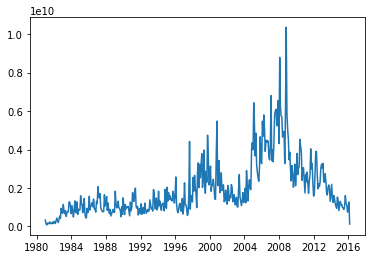

In [51]:
plt.plot( ts_data[['Volume']].resample('M').sum())

We can increase the size of the plot and render several plots at the same time:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B098FFFB08>,
      dtype=object)

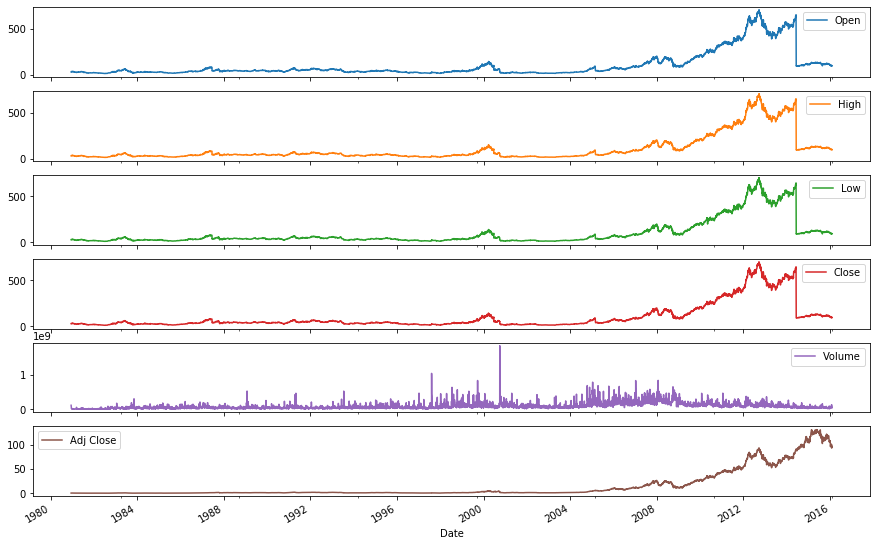

In [52]:
rcParams['figure.figsize'] = 15, 10
ts_data.plot(subplots=True)

We can use resampling to reduce the frequency of Apple share trading to annual and plot the historical variation between the min/max and the mean prices for Apple shares in each year:

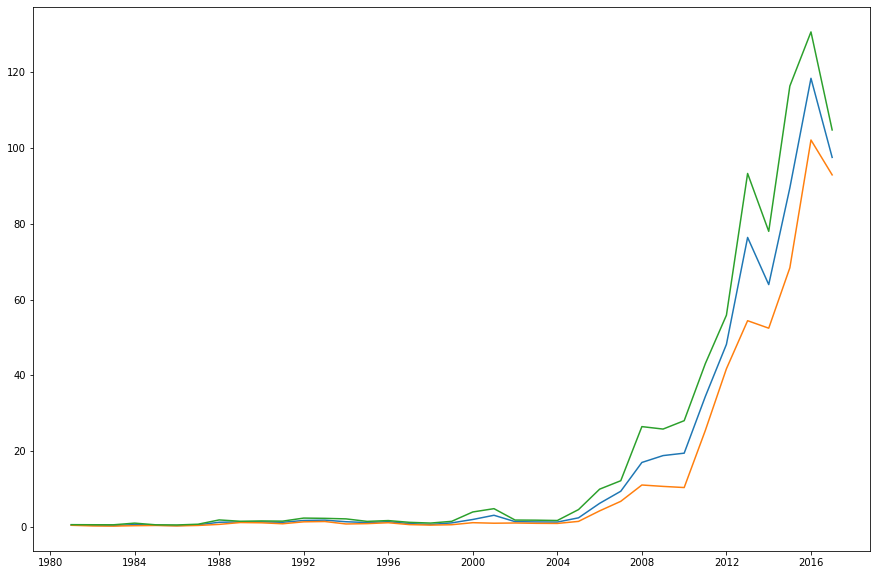

In [53]:
plt.plot( ts_data[['Adj Close']].resample('A').mean())
plt.plot( ts_data[['Adj Close']].resample('A').min())
plt.plot( ts_data[['Adj Close']].resample('A').max())

### Moving (rolling/running) statistics

A rolling average is a series of averages of different subsets of the full data set as defined by a filter window.

It is used to help smooth out price movements by filtering out the noise from random fluctuations.

In [54]:
ts_data[['Adj Close']].rolling(window=5).mean().head(10)

Adj Close
Date                 
2016-02-03        NaN
2016-02-02        NaN
2016-02-01        NaN
2016-01-29        NaN
2016-01-28  95.221304
2016-01-27  94.638467
2016-01-26  95.734519
2016-01-25  96.333270
2016-01-22  97.144867
2016-01-21  97.584483

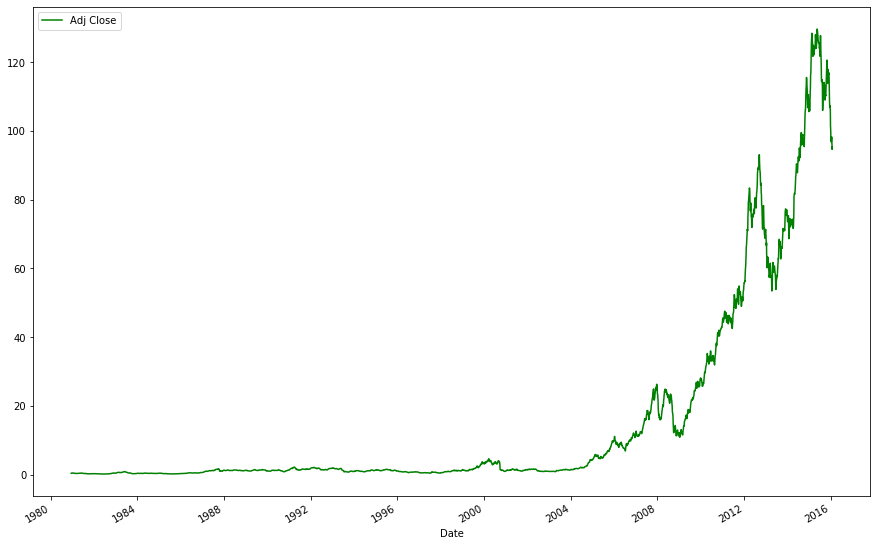

In [55]:
ts_data[['Adj Close']].rolling(window=5).mean().plot(style='-g')

##  Shift operations

**Shifting** : It is moving data backward and forward through time. Both Series and DataFrame have a  shift method for performing this operation.

**shift()** : It is a method in pandas which allows us to select a column and move data in it up or down by a given amount. Example:we wanted to calculate the difference in oil price from one year to the next.

In [56]:
ts_data.head()

Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2016-02-03  95.000000  96.839996  94.080002  96.349998  45964300  95.830001
2016-02-02  95.419998  96.040001  94.279999  94.480003  37357200  93.970098
2016-02-01  96.470001  96.709999  95.400002  96.430000  40943500  95.909571
2016-01-29  94.790001  97.339996  94.349998  97.339996  64416500  96.814656
2016-01-28  93.790001  94.519997  92.389999  94.089996  55678800  93.582196

In [57]:
ts_data['shifted'] = ts_data['Adj Close'].shift(3)
ts_data

Open       High        Low      Close     Volume  Adj Close  \
Date                                                                           
2016-02-03  95.000000  96.839996  94.080002  96.349998   45964300  95.830001   
2016-02-02  95.419998  96.040001  94.279999  94.480003   37357200  93.970098   
2016-02-01  96.470001  96.709999  95.400002  96.430000   40943500  95.909571   
2016-01-29  94.790001  97.339996  94.349998  97.339996   64416500  96.814656   
2016-01-28  93.790001  94.519997  92.389999  94.089996   55678800  93.582196   
...               ...        ...        ...        ...        ...        ...   
1980-12-18  26.625000  26.750000  26.625000  26.625000   18362400   0.401907   
1980-12-17  25.875000  25.999999  25.875000  25.875000   21610400   0.390586   
1980-12-16  25.375000  25.375000  25.250000  25.250000   26432000   0.381151   
1980-12-15  27.375001  27.375001  27.250000  27.250000   43971200   0.411342   
1980-12-12  28.750000  28.875000  28.750000  28.750000  117258400   0.433984   

              shifted  
Date                   
2016-02-03        NaN  
2016-02-02        NaN  
2016-02-01        NaN  
2016-01-29  95.830001  
2016-01-28  93.970098  
...               ...  
1980-12-18   0.466061  
1980-12-17   0.447192  
1980-12-16   0.426437  
1980-12-15   0.401907  
1980-12-12   0.390586  

[8862 rows x 7 columns]